In [1]:
##1. 데이터 전처리 및 데이터 파악

In [2]:
from sklearn import datasets
from sklearn.decomposition import PCA

In [3]:
## 자료 처리에 도움을 줄 pandas, numpy와 시각화를 위한 pyplot, seaborn 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
## iris 데이터를 불러오고, 구조를 살핀다.
iris=datasets.load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
## 수업에서는 여러 독립변수 중 처음 2개(첫번째 칼럼과 세 번쩨 칼럼)만을 사용
X=iris.data[:,[0,2]]
y=iris.target

In [6]:
print(X.shape)
feature_names=[iris.feature_names[0],iris.feature_names[2]]
df_X=pd.DataFrame(X)
df_X.head()

(150, 2)


,0,1
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [7]:
## X.shape은 150행 2열이다.

In [8]:
print(y.shape)
df_Y=pd.DataFrame(y)
df_Y.head()

(150,)


,0
0,0
1,0
2,0
3,0
4,0


In [9]:
## y.shape은 150행이다

In [10]:
## 결측치 여부 확인하기(결측치의 개수 합 출력하는 함수)
print(df_X.isnull().sum())
print(df_Y.isnull().sum())

0    0
1    0
dtype: int64
0    0
dtype: int64


In [11]:
## Y(범주형 변수)의 범주 확인하기
print(set(y))
## 각 범주의 이름 출력....?
iris.target_names

{0, 1, 2}


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

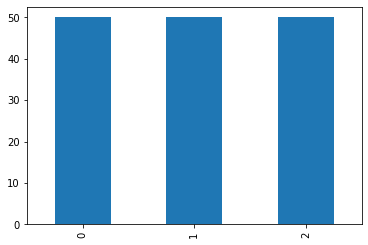

In [12]:
## 종속변수 Y (출력,반응 변수)의 분포 출력
## Y는 열이 하나니까 첫번째 열 선택(df_Y[0])
## Y범주형변수니까 각각의 범주에는 몇 개씩 있는지 카운트 하기(value_counts())
df_Y[0].value_counts().plot(kind='bar')
plt.show()

c:\users\main\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\main\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


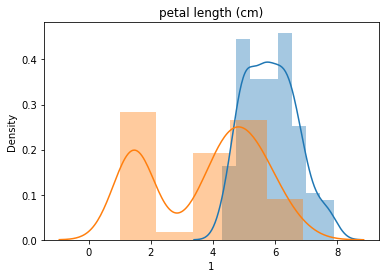

In [16]:
## 독립 변수 X(속성, 입력변수, 설명변수)의 분포 출력

for i in range(df_X.shape[1]):
    sns.distplot(df_X[i])
    plt.title(feature_names[i])
    plt.show

In [17]:
## 위의 그래프가 교안에서처럼 나오지 않음

In [18]:
##2. PCA 함수 활용 및 아웃풋 의미파악

In [19]:
## PCA 함수를 활용하여 PC를 얻어냄. 
## 아래의 경우 PC 2개를 뽑아냄.
pca=PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [20]:
pca.explained_variance_

array([3.66189877, 0.1400726 ])

In [21]:
## 첫번째 고유값은 3.6, 두번째 고유값은 0.14
## 첫번째가 굉장히 많이 설명하고 있다

In [22]:
## PC score 출력하기 
## PC score를 이용하여, 회귀분석에 활용 가능
PCscore=pca.transform(X)
PCscore[0:5]

array([[-2.46024094, -0.24479165],
       [-2.53896211, -0.06093579],
       [-2.70961121,  0.08355948],
       [-2.56511594,  0.25420858],
       [-2.49960153, -0.15286372]])

In [23]:
## 고유벡터(행이 각각의 변수들, 열이 각각의 고유벡터(칼럼벡터))...?
## 선생님 말씀이 앞뒤가 연결이 안 됨... 위 설명은 무슨 의미..?
eigens_v=pca.components_.transpose()
print(eigens_v)

[[ 0.39360585 -0.9192793 ]
 [ 0.9192793   0.39360585]]


In [24]:
## 센터링 하는 코드
mX=np.matrix(X)
for i in range(X.shape[1]):
    mX[:,i]=mX[:,i]-np.mean(X[:,i])
dfmX=pd.DataFrame(mX)

In [25]:
## 자료와 고유 벡터 곱하기
## -> 그러면 새로운 축에서의 좌표값들이 되는데, 이때의 값들이 PC score!!
(mX*eigens_v)[0:5]

matrix([[-2.46024094, -0.24479165],
        [-2.53896211, -0.06093579],
        [-2.70961121,  0.08355948],
        [-2.56511594,  0.25420858],
        [-2.49960153, -0.15286372]])

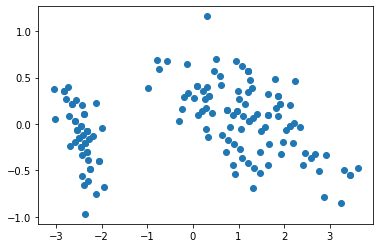

In [26]:
## 이때, X가 PCscore[:,0], Y가 PCscore[:,1]
plt.scatter(PCscore[:,0],PCscore[:,1])
plt.show()

ValueError: Argument U has a size 2 which does not match 1, the number of arrow positions

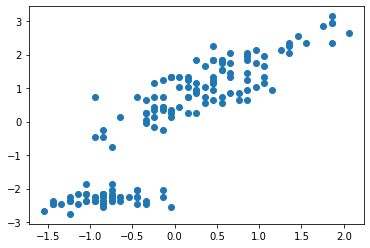

In [29]:
## PC score를 두 개 뽑아 가져와서 plot 보기
plt.scatter(dfmX[0],dfmX[1])
# origin point
origin = [0], [0]
plt.quiver(*origin, eigens_v[0,:], eigens_v[1,:], color=['r','b'], scale=3)
plt.show()

In [30]:
## Plot에 화살표가 안 나타남...!

In [31]:
##3. PC를 활용한 회귀분석

In [32]:
## 모든 독립변수를 활용(PCA(n_components=4))하여 PC를 출력
X2 = iris.data
pca2 = PCA(n_components=4)
pca2.fit(X2)

PCA(n_components=4)

In [33]:
pca2.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [34]:
## 위 결과값은 PC의 고유값 확인하는 것으로
## 순서가 뒤로 갈 수록 고유값이 작아짐..!

In [35]:
## PC의 개수는 위의 결과를 보고, 
## 많아야 2개 적으면 1개를 선택할 수 있을거라 추측! 
PCs=pca2.transform(X2)[:,0:2]

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [ ]:
## 모델의 복잡성으로 인하여 기존 자료를 이용한 분석은 수렴하지 않는 모습.

In [37]:
clf = LogisticRegression(solver="sag",multi_class="multinomial").fit(X2,y)

c:\users\main\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [38]:
## "the coef_ did not converge"
## -> 우리가 찾고자 하는 베타 값들을 못찾겠다는오류 나옴
## PC의 개수를 4개 -> 2개로 줄여서 다시!!

In [39]:
clf2 = LogisticRegression(solver="sag",multi_class="multinomial").fit(PCs,y)

In [41]:
clf2.predict(PCs)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [42]:
## 얼마나 차이가 나는지를 확인하기 위해confusion_matrix() 사용!!
confusion_matrix(y,clf2.predict(PCs))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]], dtype=int64)

In [43]:
## Out[42]:
## array([[50,  0,  0], ## 50개 중 틀린거 없음
##        [ 0, 47,  3], ## 50개 중 3개 틀림 
##        [ 0,  2, 48]], dtype=int64)  ## 50개 중 2개 틀림 

In [44]:
## PC 4개 이용한 결과와 2개 이용한 결과 비교하고 싶음!

In [45]:
clf = LogisticRegression(solver='sag', max_iter=1000, random_state=0,
                             multi_class="multinomial").fit(X2[:,0:2], y)

In [46]:
confusion_matrix(y, clf.predict(X2[:,0:2]))

array([[49,  1,  0],
       [ 0, 37, 13],
       [ 0, 14, 36]], dtype=int64)

In [48]:
## Out[46]:
## array([[49,  1,  0],  ## 50개 중 1개 틀림
##        [ 0, 37, 13],  ## 50개 중 13개 틀림
##        [ 0, 14, 36]], dtype=int64)  ## 50개 중 14개 틀림

## 차원축소를 통하여 모델의 복잡성을 줄이는 동시에 
## 최대한 많은 정보를 활용하여 분석할 수 있음!